In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("data/Income2.csv", usecols=[1,2,3]) #import Education, Seniority and Income
df_key = pd.read_csv("data/Income2.csv", usecols = [0]) #import key 

In [21]:
df.head()

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922


In [22]:
df.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173


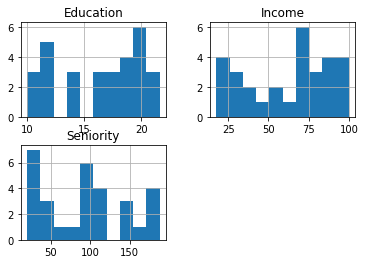

In [23]:
df.hist();

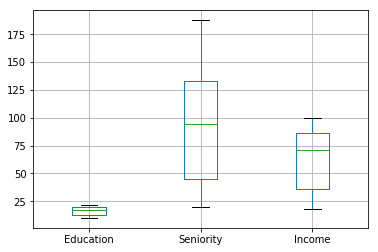

In [24]:
df.boxplot()

In [25]:
len(df_key['Unnamed: 0'].unique()) == len(df_key)

True

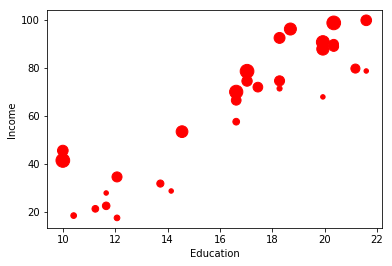

In [26]:
df.plot.scatter(x='Education', y='Income', s=df['Seniority'], c = 'r');

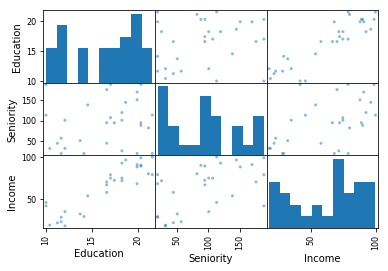

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df);

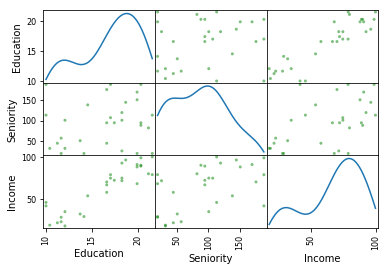

In [28]:
scatter_matrix(df, diagonal = 'kde', c='g');

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #initialize model

In [30]:
lr.fit(X = df[['Education']], y = df['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
x = np.array([18])

In [32]:
lr.predict(x.reshape([1,1]))

array([73.0522897])

Text(0.5,1,'Income vs Education Regression')

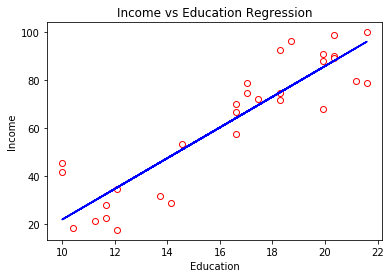

In [33]:
plt.plot(df['Education'], df['Income'],'or', mfc='white')
plt.plot(df['Education'], lr.intercept_ + lr.coef_*df['Education'], '-b')
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income vs Education Regression')

In [34]:
lr2 = LinearRegression()

In [35]:
lr2.fit(X = df[['Education', 'Seniority']], y = df['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
x = np.array([18, 60])
x = x.reshape([1,2])

In [37]:
lr2.predict(x)

array([66.4056967])

In [38]:
lr2.coef_

array([5.89555596, 0.17285547])

In [39]:
import statsmodels.formula.api as smf

In [40]:
model = smf.ols(formula = 'Income ~ Education + Seniority', data = df)

In [41]:
lr3 = model.fit()

In [42]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Thu, 12 Apr 2018   Prob (F-statistic):           1.13e-16
Time:                        12:29:50   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.000     -62.394     -37.777
Education      5.8956      0.357     16.513      0.000       5.163       6.628
Seniority      0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Discuss “Years of Education” is a stronger predictor of “Income”  or “Seniority”? Why?

At first glance, I notice that both p-values are less than 0.05. That's the first good sign. I note that both regression coefficients are positive, which fits what we'd assume, more education and/or higher seniority leads to higher Income. 

The next part of the analysis shows that the regression coefficient for Years of Education is much greater than for Seniority, 5.90 and 0.1729 respectively. This might lead us to suggest Years of Education is a stronger predictor than Seniority, but is it? 

Unfortunately I am not sure. The mean Years of Educations is approximately 16 years, with a max of 21. Seniority has a mean value of 93.8 and max value of 187. I find it hard to believe that this dataset provides Seniority in terms of Years experience. Let's just say 187 years might be a bit too long for someone to live, let alone work. 

Without knowing the units of measurement, it would be improper to use the regression coefficient as a good measure for predictor strength. What I could have done is normalize the data first. This would have allowed a better comparison between the two traits and lead to a better result. In conclusion more analysis is needed to decide which is a better predictor. Ultimately this was outside the scope of this assignment. 
